# Ejemplo de uso de CNN
# en los datos de MNIST

leemos los datos

In [1]:
import numpy as np


In [2]:
# tamaño de los datos
N = 1000
X = np.random.randn(N,3)
Y = np.random.randn(N,1)

print(X.shape)
print(Y.shape)


(1000, 3)
(1000, 1)


Hacemos modelo 1 capa densa

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Conv1D, Flatten, Dropout, BatchNormalization, MaxPooling2D

model = Sequential()
model.add(Dense(10,input_shape=(3,)))

model.add(Dense(1))

In [8]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


Modelo 1 capa convolucional

In [23]:
# Usamos un modelo secuencial
model = Sequential()


model.add(Conv1D(10, kernel_size=3, input_shape=(3,7), padding='valid')) # 

model.add(Flatten())

model.add(Dense(1))


In [24]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 1, 10)             220       
_________________________________________________________________
flatten_5 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 231
Trainable params: 231
Non-trainable params: 0
_________________________________________________________________


Se compila el modelo poniendo el optimizador, la funcióón de perdidas y si queremos una métrica

In [15]:
from tensorflow.keras.optimizers import Adam

In [16]:
optimizer_adam = Adam() # learning_rate=0.01
model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['accuracy'],)

Entrenamos...

In [35]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

Epoch 1/200
32/32 [==============================] - 1s 15ms/step - loss: 1.5823 - accuracy: 0.5178 - val_loss: 0.6625 - val_accuracy: 0.8580
Epoch 2/200
32/32 [==============================] - 0s 6ms/step - loss: 0.1188 - accuracy: 0.9653 - val_loss: 0.5140 - val_accuracy: 0.8670
Epoch 3/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0471 - accuracy: 0.9900 - val_loss: 0.3244 - val_accuracy: 0.9160
Epoch 4/200
32/32 [==============================] - 0s 7ms/step - loss: 0.0141 - accuracy: 0.9981 - val_loss: 0.2865 - val_accuracy: 0.9150
Epoch 5/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0069 - accuracy: 0.9990 - val_loss: 0.2843 - val_accuracy: 0.9210
Epoch 6/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.2656 - val_accuracy: 0.9240
Epoch 7/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2650 - val_accuracy: 0.9240
Epoch 8/200


Evaluamos en test

In [25]:
score = model.evaluate(X_test,y_test)
score

32/32 [==============================] - 0s 3ms/step - loss: 0.3867 - accuracy: 0.9320


[0.38665971159935, 0.9319999814033508]

Ploteamos la evolución

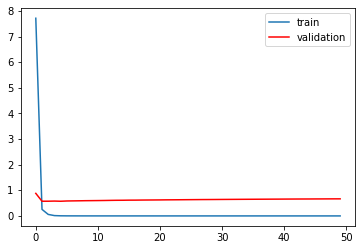

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
plt.plot(hist.history['loss'],label='train')
plt.plot(hist.history['val_loss'],'r',label='validation')
plt.legend()


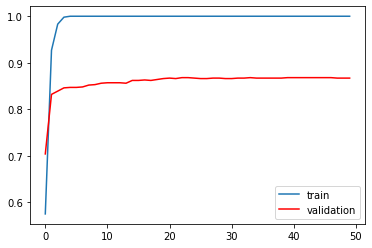

In [ ]:
# Evolucion en accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],'r',label='validation')
plt.legend()


# Aplicamos en test

In [ ]:
# Predecimos en test
preds_test = model.predict(X_test)

['p(y=0|x) = 0.0000', 'p(y=1|x) = 0.0000', 'p(y=2|x) = 0.0000', 'p(y=3|x) = 0.9997', 'p(y=4|x) = 0.0000', 'p(y=5|x) = 0.0000', 'p(y=6|x) = 0.0000', 'p(y=7|x) = 0.0000', 'p(y=8|x) = 0.0003', 'p(y=9|x) = 0.0000']


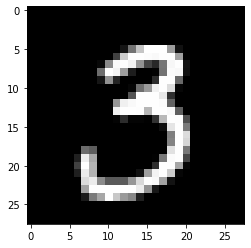

In [ ]:
import numpy as np
# Elegimos una imagen de test
idx_mostrar = 90
# Mostramos la imagen
plt.imshow(np.squeeze(X_test[idx_mostrar,:,:,]),cmap="gray")
# Mostramos las probabilidades que da el modelo a cada clase
print(["p(y=%d|x) = %.4f"%(i,p) for i,p in enumerate(preds_test[idx_mostrar])])